In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Importing the dataset
bank=pd.read_csv('bank1.csv')
bank

C:\Users\Priyanka\AppData\Local\Temp\ipykernel_12272\3534919737.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  bank=pd.read_csv('bank1.csv')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Unnamed: 17
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,NaN
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,NaN
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,NaN
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,NaN
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,NaN


## EDA

In [17]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   housing      45211 non-null  object
 6   loan         45211 non-null  object
 7   contact      45211 non-null  object
 8   day          45211 non-null  int64 
 9   month        45211 non-null  object
 10  campaign     45211 non-null  int64 
 11  pdays        45211 non-null  int64 
 12  previous     45211 non-null  int64 
 13  poutcome     45211 non-null  object
 14  y            45211 non-null  object
 15  Unnamed: 17  1 non-null      object
dtypes: int64(5), object(11)
memory usage: 5.5+ MB


In [18]:
bank.describe()

,age,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,2.763841,40.197828,0.580323
std,10.618762,8.322476,3.098021,100.128746,2.303441
min,18.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,31.000000,63.000000,871.000000,275.000000


In [23]:
bank.isnull().any()

age            False
job            False
marital        False
education      False
default        False
housing        False
loan           False
contact        False
day            False
month          False
campaign       False
pdays          False
previous       False
poutcome       False
y              False
Unnamed: 17     True
dtype: bool

In [3]:
bank=bank.drop(['balance','duration'],axis=1)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   housing      45211 non-null  object
 6   loan         45211 non-null  object
 7   contact      45211 non-null  object
 8   day          45211 non-null  int64 
 9   month        45211 non-null  object
 10  campaign     45211 non-null  int64 
 11  pdays        45211 non-null  int64 
 12  previous     45211 non-null  int64 
 13  poutcome     45211 non-null  object
 14  y            45211 non-null  object
 15  Unnamed: 17  1 non-null      object
dtypes: int64(5), object(11)
memory usage: 5.5+ MB


<AxesSubplot:xlabel='y', ylabel='count'>

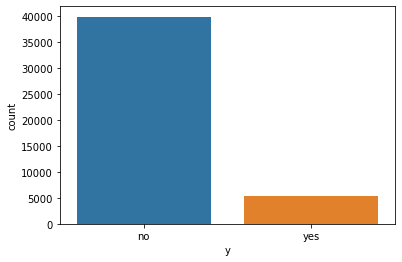

In [31]:
sns.countplot(x="y",data=bank)

<AxesSubplot:xlabel='job', ylabel='count'>

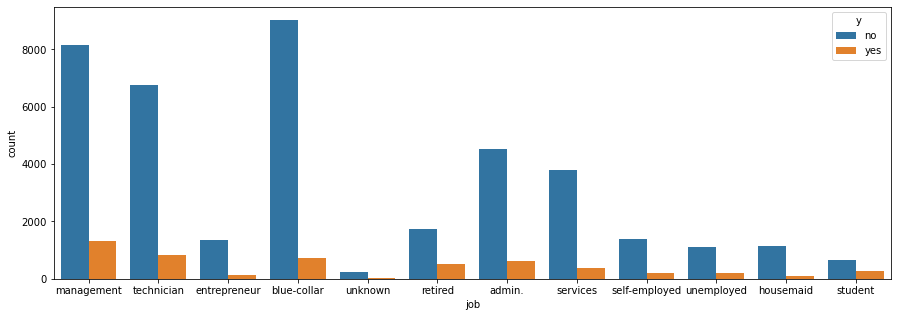

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(x="job",data=bank,hue = 'y')

<AxesSubplot:xlabel='y', ylabel='age'>

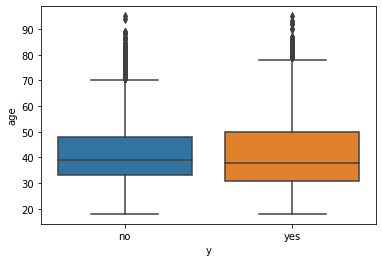

In [35]:
sns.boxplot(data=bank,x='y',y='age')

<AxesSubplot:xlabel='education', ylabel='count'>

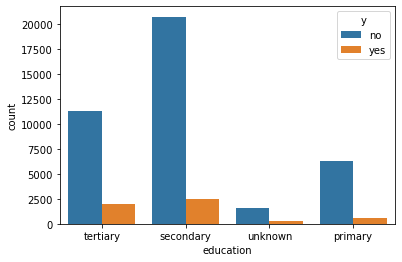

In [37]:
sns.countplot(x="education",data=bank,hue = 'y')

<AxesSubplot:xlabel='default', ylabel='count'>

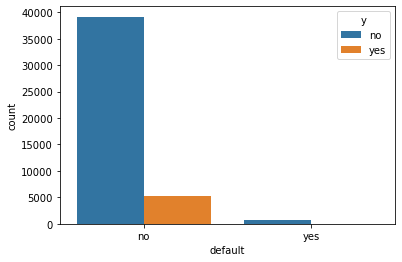

In [39]:
sns.countplot(x="default",data=bank,hue = 'y')

<AxesSubplot:xlabel='housing', ylabel='count'>

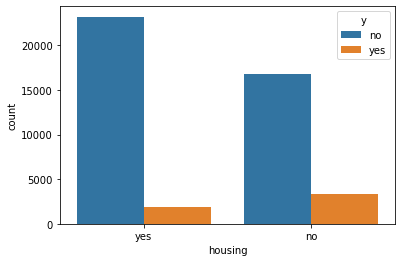

In [40]:
sns.countplot(x="housing",data=bank,hue = 'y')

<AxesSubplot:xlabel='loan', ylabel='count'>

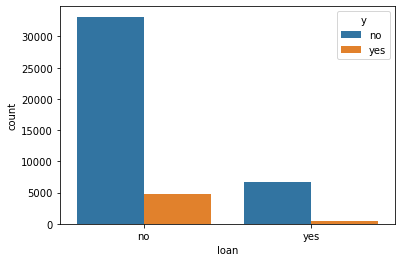

In [41]:
sns.countplot(x="loan",data=bank,hue = 'y')

<AxesSubplot:xlabel='contact', ylabel='count'>

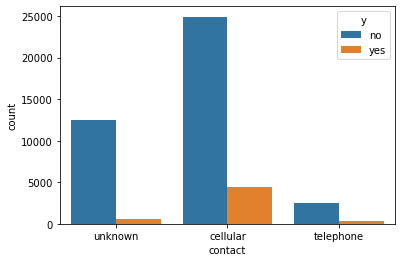

In [42]:
sns.countplot(x="contact",data=bank,hue = 'y')

<AxesSubplot:xlabel='poutcome', ylabel='count'>

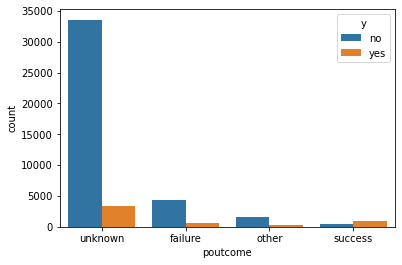

In [43]:
sns.countplot(x="poutcome",data=bank,hue = 'y')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>]],
      dtype=object)

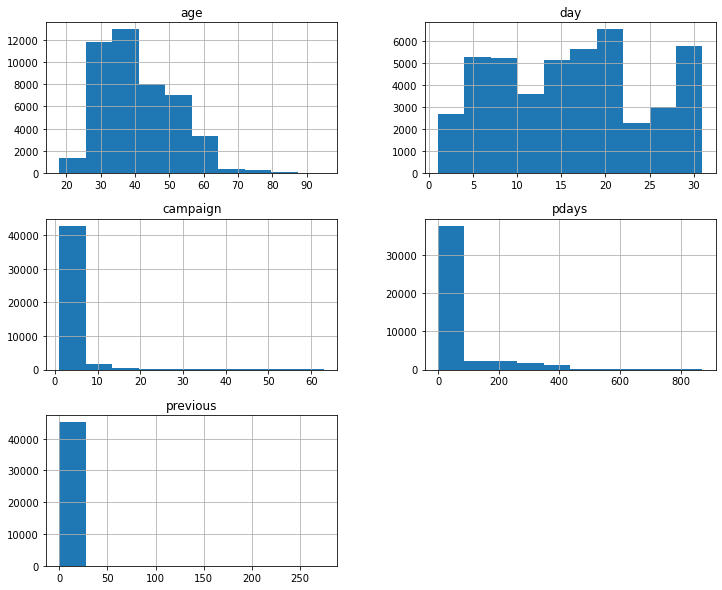

In [44]:
bank.hist(figsize=(12,10))

In [5]:
# One-Hot Encoding of categrical variables
data1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome'])
data1

,age,default,housing,loan,day,month,campaign,pdays,previous,y,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,yes,no,5,may,1,-1,0,no,...,0,1,0,0,0,1,0,0,0,1
1,44,no,yes,no,5,may,1,-1,0,no,...,1,0,0,0,0,1,0,0,0,1
2,33,no,yes,yes,5,may,1,-1,0,no,...,1,0,0,0,0,1,0,0,0,1
3,47,no,yes,no,5,may,1,-1,0,no,...,0,0,1,0,0,1,0,0,0,1
4,33,no,no,no,5,may,1,-1,0,no,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,no,no,17,nov,3,-1,0,yes,...,0,1,0,1,0,0,0,0,0,1
45207,71,no,no,no,17,nov,2,-1,0,yes,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,no,no,17,nov,5,184,3,yes,...,1,0,0,1,0,0,0,0,1,0
45209,57,no,no,no,17,nov,4,-1,0,no,...,1,0,0,0,1,0,0,0,0,1


In [6]:
# To see all columns
pd.set_option("display.max.columns", None)
data1

,age,default,housing,loan,day,month,campaign,pdays,previous,y,Unnamed: 17,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,yes,no,5,may,1,-1,0,no,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,yes,no,5,may,1,-1,0,no,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,yes,yes,5,may,1,-1,0,no,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,yes,no,5,may,1,-1,0,no,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,no,no,5,may,1,-1,0,no,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,no,no,17,nov,3,-1,0,yes,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,no,no,no,17,nov,2,-1,0,yes,NaN,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,no,no,no,17,nov,5,184,3,yes,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,no,no,no,17,nov,4,-1,0,no,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   housing              45211 non-null  object
 3   loan                 45211 non-null  object
 4   day                  45211 non-null  int64 
 5   month                45211 non-null  object
 6   campaign             45211 non-null  int64 
 7   pdays                45211 non-null  int64 
 8   previous             45211 non-null  int64 
 9   y                    45211 non-null  object
 10  Unnamed: 17          1 non-null      object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [8]:
# Custom Binary Encoding of Binary o/p variables 
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,housing,loan,day,month,campaign,pdays,previous,y,Unnamed: 17,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,1,0,5,may,1,-1,0,0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,1,0,5,may,1,-1,0,0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,1,1,5,may,1,-1,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1,0,5,may,1,-1,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,0,0,5,may,1,-1,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,0,0,17,nov,3,-1,0,1,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,0,0,17,nov,2,-1,0,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,0,0,17,nov,5,184,3,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,0,0,17,nov,4,-1,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [9]:
# Find and Replace Encoding for month categorical varaible
data1['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [10]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [11]:
data1=data1.replace(order)

In [12]:
data1

,age,default,housing,loan,day,month,campaign,pdays,previous,y,Unnamed: 17,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,1,0,5,5,1,-1,0,0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,1,0,5,5,1,-1,0,0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,1,1,5,5,1,-1,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1,0,5,5,1,-1,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,0,0,5,5,1,-1,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,0,0,17,11,3,-1,0,1,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,0,0,17,11,2,-1,0,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,0,0,17,11,5,184,3,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,0,0,17,11,4,-1,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  int32 
 2   housing              45211 non-null  int32 
 3   loan                 45211 non-null  int32 
 4   day                  45211 non-null  int64 
 5   month                45211 non-null  int64 
 6   campaign             45211 non-null  int64 
 7   pdays                45211 non-null  int64 
 8   previous             45211 non-null  int64 
 9   y                    45211 non-null  int32 
 10  Unnamed: 17          1 non-null      object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

## Model Building

In [24]:
X = data1.iloc[:,[1,2,3,4,5,6,7,8]]
y = data1.iloc[:,9]
classifier = LogisticRegression()
classifier.fit(X,y)

C:\Users\Priyanka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Predictions

In [25]:
# Predict for x dataset
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


## Testing Model Accuracy

In [27]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39874,    48],
       [ 5266,    23]], dtype=int64)

In [ ]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39107+1282)/(39107+815+4007+1282)

In [28]:
# As accuracy = 0.8933, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
classifier.predict_proba(X)[:,1] 

array([0.08074176, 0.08074176, 0.04506284, ..., 0.21738355, 0.14153938,
       0.4248774 ])

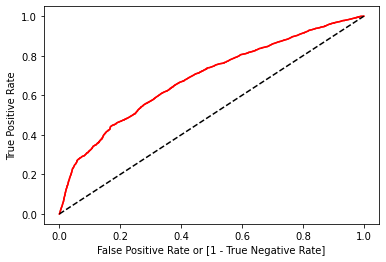

auc accuracy: 0.5015731517828645


In [29]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)